<a href="https://colab.research.google.com/github/rockingkamal/ML_User_Engagement_project/blob/main/User_engagment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:
A client has data on users for an application from the past two years. They define an "adopted
user" as a user who has logged into the application on three separate days in at least one seven-
day period. They want to understand what variables contribute to a user converting into
an adopted user. The assignment is to inspect the data and prepare an analysis that
shows non-technical stakeholders what variables and conditions are associated with
user adoption.

The data has the following two tables:
1. A user table ("takehome_users") with data on 12,000 users who signed up for the
product in the last two years. This table includes:

● name: the user's name

● object_id: the user's id

● email: email address

● creation_source: how their account was created. This takes on one of 5 values:

  1.PERSONAL_PROJECTS: invited to join another user's personal workspace

  2.GUEST_INVITE: invited to an organization as a guest (limited permissions)

  3.ORG_INVITE: invited to an organization (as a full member)

  4.SIGNUP: signed up via the website

  5.SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a
  Google email account for their login id)

● creation_time: when they created their account

● last_session_creation_time: unix timestamp of last login

● opted_in_to_mailing_list: whether they have opted into receiving marketing emails

● enabled_for_marketing_drip: whether they are on the regular marketing email
drip

● org_id: the organization (group of users) they belong to

● invited_by_user_id: which user invited them to join (if applicable)

2. A usage summary table ("takehome_user_engagement") that has a row for each day that
a user logged into the product.

#Instructions:
Defining an "adopted user" as a user who has logged into the application on three separate days
in at least one seven day period, identify which factors predict future user adoption.




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
users_df = pd.read_csv("/content/takehome_user_engagement 1.csv")
engagement_df = pd.read_csv("/content/takehome_users 2.csv",encoding="latin-1")

In [ ]:
users_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
users_df.shape

(207917, 3)

In [ ]:
engagement_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
engagement_df.shape

(12000, 10)

In [ ]:
users_df.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [ ]:
engagement_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [ ]:
users_df['time_stamp'] = pd.to_datetime(users_df['time_stamp'])
engagement_df['creation_time'] = pd.to_datetime(engagement_df['creation_time'])


In [ ]:
# Rename the column from other dataset
engagement_df.rename(columns={'object_id': 'user_id'}, inplace=True)
engagement_df.head(2)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [ ]:
merged_df = pd.merge(users_df, engagement_df, on='user_id', how='inner')
merged_df.head(5)


,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [ ]:
merged_df.shape

(207917, 12)

In [ ]:
merged_df['last_session_creation_time'] = pd.to_datetime(merged_df['last_session_creation_time'], unit='s')

In [ ]:
engagement_summary = merged_df.groupby('user_id')['time_stamp'].agg(['count', 'min', 'max'])
engagement_summary.columns = ['login_count', 'first_login', 'last_login']

In [ ]:
engagement_summary['first_login'] = pd.to_datetime(engagement_summary['first_login'])
engagement_summary['last_login'] = pd.to_datetime(engagement_summary['last_login'])

#creating a new variable for user active days
engagement_summary['days_active'] = (engagement_summary['last_login'] - engagement_summary['first_login']).dt.days + 1
engagement_summary.head(2)

,login_count,first_login,last_login,days_active
user_id,,,,
1,1,2014-04-22 03:53:30,2014-04-22 03:53:30,1
2,14,2013-11-15 03:45:04,2014-03-31 03:45:04,137


In [ ]:
# Merge the engagement summary with original DataFrame filling null values with "0".
final_df = pd.merge(merged_df, engagement_summary, how='left', left_on='user_id', right_index=True)
final_df.fillna(0, inplace=True)
final_df.head(2)

,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,login_count,first_login,last_login,days_active
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,2014-04-22 03:53:30,2014-04-22 03:53:30,1
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,14,2013-11-15 03:45:04,2014-03-31 03:45:04,137


In [ ]:

numerical_df = final_df.select_dtypes(include=['int64', 'float64'])

# correlation matrix
correlation_matrix = numerical_df.corr()
correlation_matrix

,user_id,visited,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,login_count,days_active,adopted_user
user_id,1.000000,NaN,-0.040880,-0.029354,-0.033602,0.078437,-0.019169,-0.015520,-0.004723
visited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opted_in_to_mailing_list,-0.040880,NaN,1.000000,0.472487,-0.042151,0.031683,-0.030812,-0.023203,0.002973
enabled_for_marketing_drip,-0.029354,NaN,0.472487,1.000000,-0.028640,0.051575,0.003020,0.014233,0.001849
org_id,-0.033602,NaN,-0.042151,-0.028640,1.000000,-0.058269,0.062455,0.043671,0.042304
invited_by_user_id,0.078437,NaN,0.031683,0.051575,-0.058269,1.000000,-0.009010,-0.007455,0.008793
login_count,-0.019169,NaN,-0.030812,0.003020,0.062455,-0.009010,1.000000,0.860337,0.284885
days_active,-0.015520,NaN,-0.023203,0.014233,0.043671,-0.007455,0.860337,1.000000,0.423153
adopted_user,-0.004723,NaN,0.002973,0.001849,0.042304,0.008793,0.284885,0.423153,1.000000


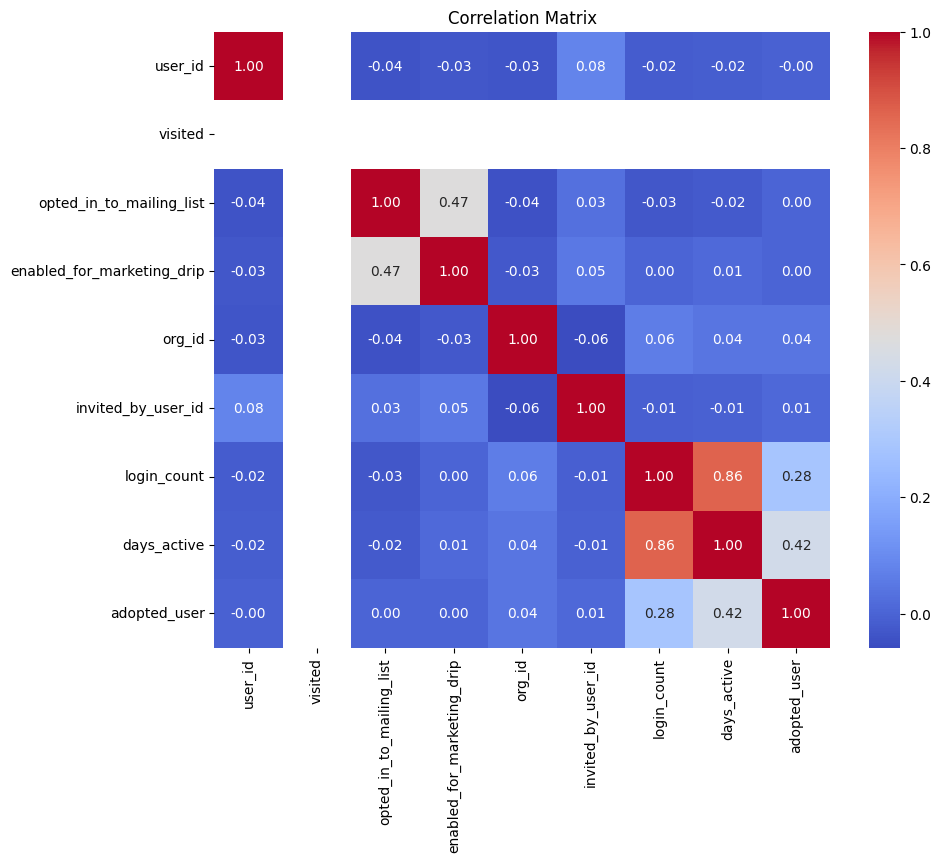

In [ ]:
# Ploting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

#Key Insights from feature correlation:
1. Positive Correlation between Login Count and Days Active
2. No Strong Correlation between Adoption Status and Other Features
3. Moderate Positive Correlation between Adoption Status and Login Count

In [ ]:
final_df['adopted_user'] = final_df['days_active'].apply(lambda x :1 if x>=3 else 0)
final_df['adopted_user'].value_counts()

1    201648
0      6269
Name: adopted_user, dtype: int64

We can see the class lables are imbalance we can't do model building as train data will be huge impact on '1s' whichh is adopted *user*

In [ ]:
'''

from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)

X = final_df.drop(columns=['adopted_user'])
y = final_df['adopted_user']

X_train, y_train = undersampler.fit_resample(X, y)

# balanced class distribution
print("After Random Undersampling:")
print(pd.Series(y_train).value_counts())

'''

'\n\nfrom imblearn.under_sampling import RandomUnderSampler\n\nundersampler = RandomUnderSampler(random_state=42)\n\nX = final_df.drop(columns=[\'adopted_user\'])\ny = final_df[\'adopted_user\']\n\nX_train, y_train = undersampler.fit_resample(X, y)\n\n# balanced class distribution\nprint("After Random Undersampling:")\nprint(pd.Series(y_train).value_counts())\n\n'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   creation_time               207917 non-null  datetime64[ns]
 4   name                        207917 non-null  object        
 5   email                       207917 non-null  object        
 6   creation_source             207917 non-null  object        
 7   last_session_creation_time  207917 non-null  datetime64[ns]
 8   opted_in_to_mailing_list    207917 non-null  int64         
 9   enabled_for_marketing_drip  207917 non-null  int64         
 10  org_id                      207917 non-null  int64         
 11  invited_by_user_id          207917 non-

In [ ]:
final_df.describe()

,user_id,visited,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,login_count,days_active,adopted_user
count,207917.000000,207917.0,207917.000000,207917.000000,207917.000000,207917.000000,207917.000000,207917.000000,207917.000000
mean,5913.314197,1.0,0.258137,0.154533,164.315895,3357.439502,255.839777,476.009268,0.969849
std,3394.941674,0.0,0.437611,0.361460,121.165846,3834.871624,157.722007,197.926263,0.171004
min,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3087.000000,1.0,0.000000,0.000000,60.000000,0.000000,123.000000,351.000000,1.000000
50%,5682.000000,1.0,0.000000,0.000000,145.000000,1585.000000,255.000000,526.000000,1.000000
75%,8944.000000,1.0,1.000000,0.000000,260.000000,6442.000000,379.000000,644.000000,1.000000
max,12000.000000,1.0,1.000000,1.000000,416.000000,11999.000000,606.000000,728.000000,1.000000


Summary stats:
1. User Engagement:
On average, users have logged into the application once per day.
The login_count varies widely, with some users logging in only once and others up to 606 times.

2. Feature Adoption:
A significant portion of users have opted into the mailing list, with around 25.8% of users choosing this option.
Approximately 15.5% of users are enabled for the marketing drip, suggesting a moderate level of engagement with marketing communications.

3. Organizational Structure:
Users are associated with a range of organizations, as indicated by the org_id feature, which spans from 0 to 416.

4. Adopted Users:
The dataset is predominantly composed of adopted users, with approximately 97% of users meeting the criteria for being considered adopted users.

In [ ]:
not_active = final_df[final_df.adopted_user == 1]
active = final_df[final_df.adopted_user == 0]
print(not_active.shape)
print(active.shape)

(201648, 17)
(6269, 17)


##As the class data is imbalnced need few techniques to balance the train test data

In [ ]:
final_df.groupby('adopted_user').mean()

<ipython-input-95-35ba1463bcee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df.groupby('adopted_user').mean()


,user_id,visited,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,login_count,days_active
adopted_user,,,,,,,,
0,6004.249641,1.0,0.250758,0.150742,135.245015,3166.193332,1.005424,1.005424
1,5910.487121,1.0,0.258366,0.154651,165.219675,3363.385122,263.762279,490.776581


In [ ]:
not_active_sample = not_active.sample(n = 6269)
new_df = pd.concat([not_active_sample,active],axis = 0)
new_df['adopted_user'].value_counts()

1    6269
0    6269
Name: adopted_user, dtype: int64

In [ ]:
#Creation source feature needs to getdummies before training the model as it has multipple categories
new_df['creation_source'].value_counts()

ORG_INVITE            4381
SIGNUP                2587
GUEST_INVITE          2447
SIGNUP_GOOGLE_AUTH    2046
PERSONAL_PROJECTS     1077
Name: creation_source, dtype: int64

In [ ]:
#train test split
features = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']
X = pd.get_dummies(new_df[features])
y = new_df['adopted_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1254
           1       0.54      0.50      0.52      1254

    accuracy                           0.54      2508
   macro avg       0.54      0.54      0.54      2508
weighted avg       0.54      0.54      0.54      2508



#Precision, Recall and F1-Score:
1. Precision measure the proportion of true positive predictions among all positive predictions for class 0 (non-adopted users) is 0.52, and for class 1 (adopted users) is 0.53.
2. Recall measures the proportion of true positive predictions among all actual positive instances for class 0 is 0.56, and for class 1 is 0.49.
3. higher precision indicates fewer false positives, while a higher recall indicates fewer false negatives.
4. f1-score considers both false positives and false negatives for class 0 is 0.54, and for class 1 is 0.51.
6. Higher the F1-score indicates better overall performance.


#key Inferences:
the model achieves moderate precision, recall, and F1-score for both classes, its overall accuracy is relatively low. This suggests that the model's performance may be influenced by factors such as class imbalance, feature quality, or model complexity. Further analysis and optimization may be required to improve the model's performance and better understand the factors contributing to user adoption.

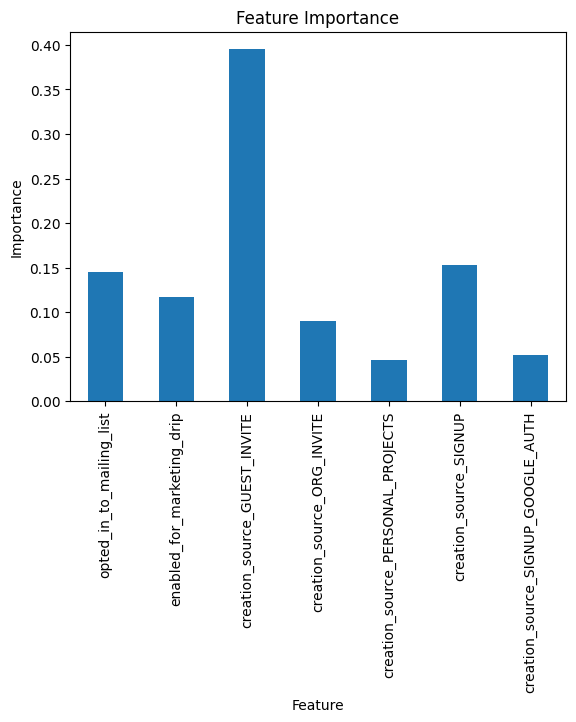

In [ ]:
# Feature Importance graph
importance = rf_classifier.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


#Feature Importance inferences:
1. The most important feature for predicting user adoption is creation_source_GUEST_INVITE, followed by enabled_for_marketing_drip.
2. This suggests that users who were invited as guests have a higher likelihood of becoming adopted users compared to other creation sources.
3. Marketing Engagement Impact: Users who are enabled for marketing drip (enabled_for_marketing_drip) also show significant importance, indicating that marketing engagement strategies might play a role in user adoption.
4. Opted-in to Mailing List: Although less important than creation source and marketing drip, opting in to the mailing list (opted_in_to_mailing_list) still has a non-negligible impact on user adoption.
5. Other Creation Sources: Other creation sources like ORG_INVITE, PERSONAL_PROJECTS, SIGNUP, and SIGNUP_GOOGLE_AUTH also contribute to user adoption but to a lesser extent compared to guest invites.
6. These insights can guide marketing and user engagement strategies by focusing more on guest invites and marketing drip features to increase user adoption rates.

#Hyper-parameter Tuning using Grid search

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE analysis to oversample the minority class which is "0".
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("f1score:", f1_score)

Precision: 0.548936170212766
Recall: 0.40822784810126583
f1score: 0.4682395644283122


#Key Inferences after hyper-parameter tuning

1. The improved precision suggests that the model is better at avoiding false positive predictions, reducing the risk of misclassifying non-adopted users as adopted.
2. the decrease in recall indicates that the model may miss some actual adopted users, leading to false negatives.
3. Despite the trade-off between precision and recall, the F1-score provides a balanced evaluation of the model's performance, considering both false positives and false negatives.
4. The updated model's performance suggests that the hyperparameter tuning has led to improvements in precision, indicating better identification of true adopted users.
5. there is a trade-off with recall, as the model may miss some actual adopted users compared to the previous model.
6. The overall F1-score indicates reasonable performance in balancing precision and recall, although there is room for further optimization.

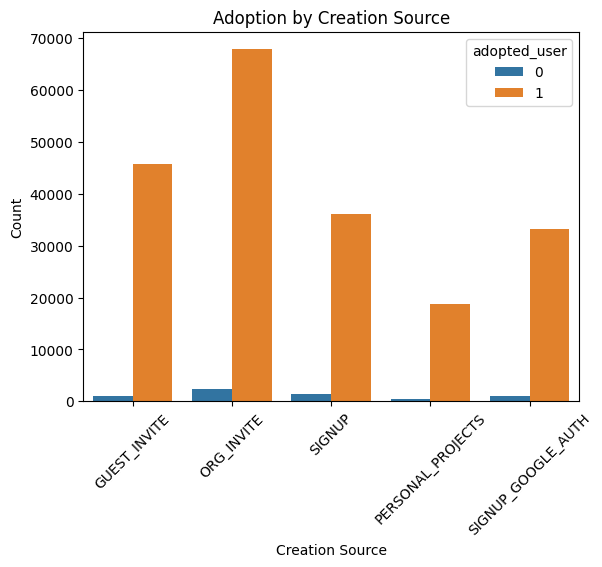

In [ ]:
# Explore the relationship between features and the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='creation_source', hue='adopted_user', data=final_df)
plt.title('Adoption by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Adapted_user by Creation_Source:
1. Guest Invitations: Users who were invited as guests (creation_source_guest_invite) show a notably higher number of adopted users (1) compared to non-adopted users (0). This indicates that guest invitations might play a crucial role in user adoption, with a substantial number of users becoming adopted users after being invited as guests.

2. Organizational Invitations: Similarly, users who were invited through organizational invitations (creation_source_org_invite) exhibit a considerably higher number of adopted users compared to non-adopted users. This suggests that organizational invitations also contribute significantly to user adoption, possibly indicating a higher level of engagement among users invited through organizational channels.

3. Personal Projects and Signups: Users who signed up for the application through personal projects (creation_source_personal_project) or direct signups (creation_source_signup) also demonstrate a notable number of adopted users. While these sources have a lower count of adopted users compared to guest and organizational invitations, they still contribute positively to user adoption.

4. Google Authentication: Users who signed up through Google authentication (creation_source_google_auth) show a lower number of adopted users compared to other creation sources. This indicates that users signing up through Google authentication might have a lower likelihood of becoming adopted users compared to users from other sources.

5. the creation source seems to be a crucial factor influencing user adoption. Strategies to increase user adoption could focus on optimizing guest invitations, organizational invitations, and direct signups, while also considering the potential impact of authentication methods such as Google authentication. These insights can guide the client in developing targeted marketing and user engagement strategies to enhance user adoption rates.


#Thanks for the opportunity to work on this promlem statement...